In [70]:
# TA05.ipynb - Lengkap untuk TA (Decision Tree)
# 0) Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [71]:
# 1) Load dataset
df = pd.read_csv("health_lifestyle_dataset.csv")
print("Nama kolom dataset:", df.columns.tolist())


Nama kolom dataset: ['id', 'usia', 'jenis_kelamin', 'indeks_massa_tubuh', 'langkah_harian', 'jam_tidur', 'air_minum_per_hari', 'asupan_kalori_harian', 'perokok', 'alkohol', 'denyut_jantung', 'systolic_bp', 'diastolic_bp', 'kolesterol', 'riwayat_keluarga', 'risiko_penyakit']


In [72]:
# 2) EDA dasar & quality check
print("\n>> Cek missing values per kolom:")
print(df.isnull().sum())

print("\n>> Info singkat:")
print(df.info())

print("\n>> Statistik numerik:")
display(df.describe().T)


>> Cek missing values per kolom:
id                      0
usia                    0
jenis_kelamin           0
indeks_massa_tubuh      0
langkah_harian          0
jam_tidur               0
air_minum_per_hari      0
asupan_kalori_harian    0
perokok                 0
alkohol                 0
denyut_jantung          0
systolic_bp             0
diastolic_bp            0
kolesterol              0
riwayat_keluarga        0
risiko_penyakit         0
dtype: int64

>> Info singkat:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   usia                  100000 non-null  int64  
 2   jenis_kelamin         100000 non-null  object 
 3   indeks_massa_tubuh    100000 non-null  float64
 4   langkah_harian        100000 non-null  int64  
 5   jam_tidur             100000 non-null  f

,count,mean,std,min,25%,50%,75%,max
id,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
usia,100000.0,48.525990,17.886768,18.0,33.00,48.0,64.00,79.0
indeks_massa_tubuh,100000.0,29.024790,6.352666,18.0,23.50,29.0,34.50,40.0
langkah_harian,100000.0,10479.870290,5483.632360,1000.0,5729.00,10468.0,15229.00,19999.0
jam_tidur,100000.0,6.491784,2.021922,3.0,4.70,6.5,8.20,10.0
air_minum_per_hari,100000.0,2.751496,1.297338,0.5,1.60,2.8,3.90,5.0
asupan_kalori_harian,100000.0,2603.341200,807.288563,1200.0,1906.00,2603.0,3299.00,3999.0
perokok,100000.0,0.200940,0.400705,0.0,0.00,0.0,0.00,1.0
alkohol,100000.0,0.300020,0.458269,0.0,0.00,0.0,1.00,1.0
denyut_jantung,100000.0,74.457420,14.423715,50.0,62.00,74.0,87.00,99.0


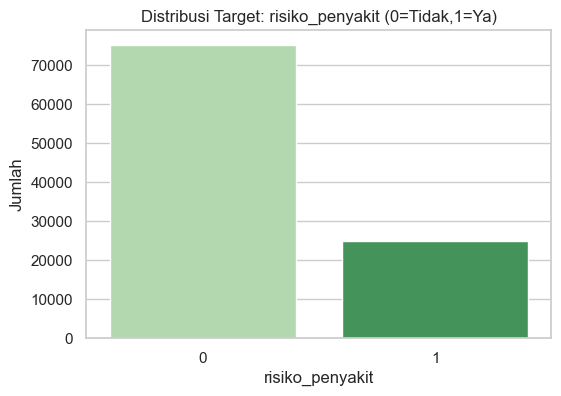

In [73]:
# 3) Visualisasi distribusi target & balance
plt.figure(figsize=(6,4))
sns.countplot(x=df['risiko_penyakit'], palette="Greens")
plt.title("Distribusi Target: risiko_penyakit (0=Tidak,1=Ya)")
plt.xlabel("risiko_penyakit")
plt.ylabel("Jumlah")
plt.show()

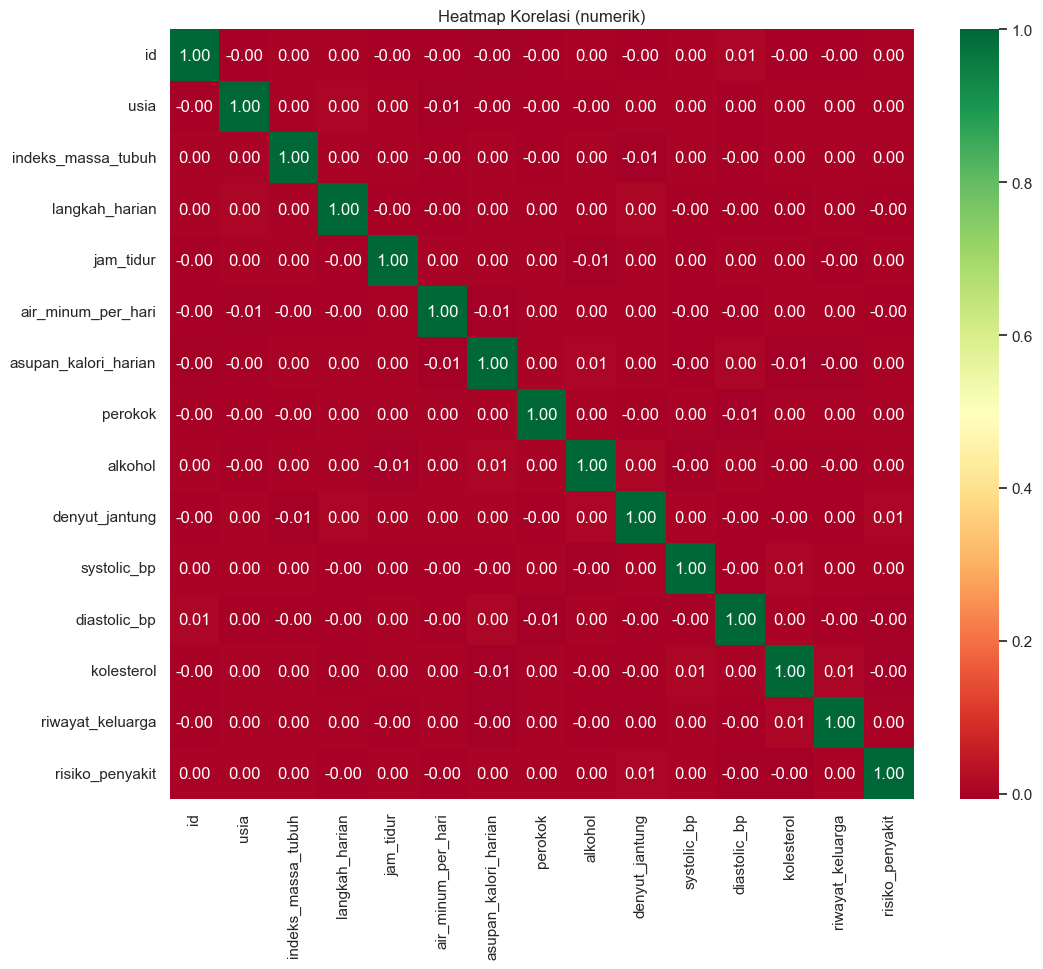

In [74]:
# 4) Visualisasi korelasi numerik (heatmap)
plt.figure(figsize=(12,10))
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("Heatmap Korelasi (numerik)")
plt.show()

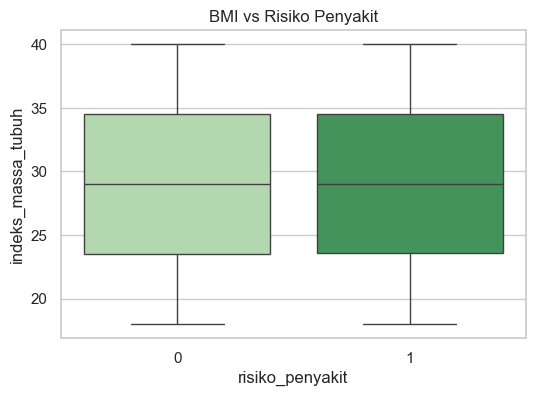

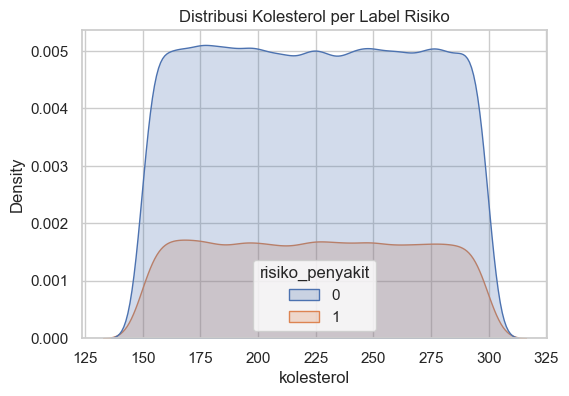

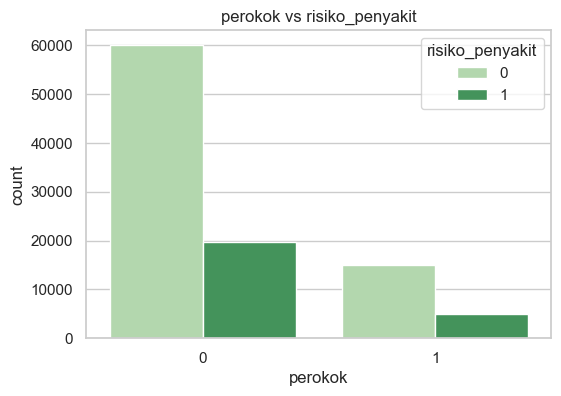

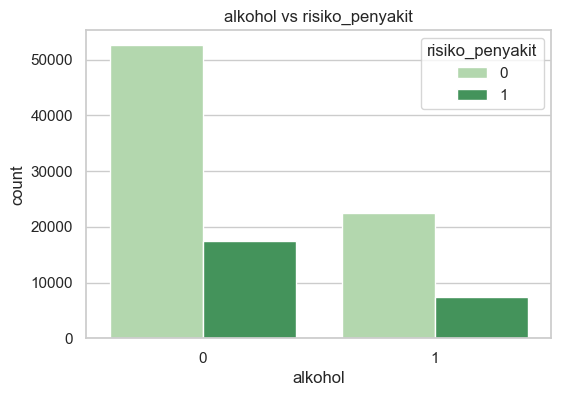

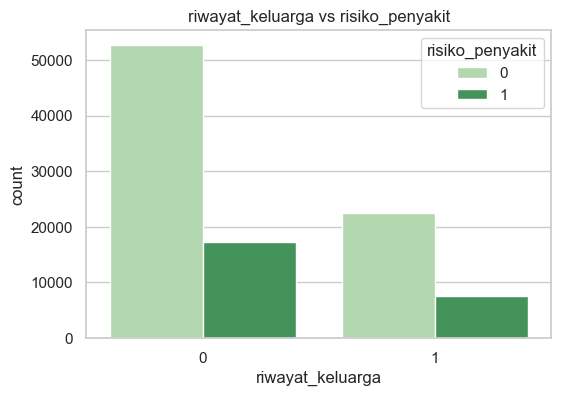

In [75]:
# 5) Analisis hubungan fitur vs target (beberapa contoh)
# Boxplot BMI by target
plt.figure(figsize=(6,4))
sns.boxplot(x='risiko_penyakit', y='indeks_massa_tubuh', data=df, palette="Greens")
plt.title("BMI vs Risiko Penyakit")
plt.show()

# Distribusi kolesterol by target
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='kolesterol', hue='risiko_penyakit', fill=True)
plt.title("Distribusi Kolesterol per Label Risiko")
plt.show()

# Categorical features counts by target (perokok, alkohol, riwayat_keluarga)
for cat in ['perokok','alkohol','riwayat_keluarga']:
    if cat in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=cat, hue='risiko_penyakit', data=df, palette="Greens")
        plt.title(f"{cat} vs risiko_penyakit")
        plt.show()

In [76]:
# 6) Missing value handling (dataset sintetis sering bersih) - tapi aman:
print("\nProporsi missing (%):")
missing_pct = df.isnull().mean()*100
print(missing_pct[missing_pct>0])

# jika ada missing numeric -> fill dengan median
for c in df.select_dtypes(include=[np.number]).columns:
    if df[c].isnull().sum()>0:
        med = df[c].median()
        df[c].fillna(med, inplace=True)

# jika ada missing categorical -> fill dengan modus
for c in df.select_dtypes(include=['object']).columns:
    if df[c].isnull().sum()>0:
        mode = df[c].mode()[0]
        df[c].fillna(mode, inplace=True)


Proporsi missing (%):
Series([], dtype: float64)


In [77]:
# 7) Penanganan kategorikal: encode jenis_kelamin dan pastikan perokok/alkohol/riwayat binary numeric
# jenis_kelamin may be 'male'/'female' or 'Male' etc -- encode:
if 'jenis_kelamin' in df.columns:
    df['jenis_kelamin'] = df['jenis_kelamin'].astype(str)
    le = LabelEncoder()
    df['jenis_kelamin_enc'] = le.fit_transform(df['jenis_kelamin'])  # store encoding if needed
    print("Mapping jenis_kelamin:", dict(zip(le.classes_, le.transform(le.classes_))))

# ensure binary cols numeric
for col in ['perokok','alkohol','riwayat_keluarga']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

Mapping jenis_kelamin: {'Female': 0, 'Male': 1}


In [78]:
# 8) Feature engineering sederhana (opsional)
# contoh: bmi_kategori, short_sleep flag
df['bmi_obesitas'] = (df['indeks_massa_tubuh'] >= 30).astype(int)
df['tidur_singkat'] = (df['jam_tidur'] < 6).astype(int)

In [79]:
# 9) Siapkan X dan y (pilih fitur yang masuk akal)
features = [
    'usia','jenis_kelamin_enc','indeks_massa_tubuh','langkah_harian','jam_tidur',
    'air_minum_per_hari','asupan_kalori_harian','perokok','alkohol','denyut_jantung',
    'systolic_bp','diastolic_bp','kolesterol','riwayat_keluarga',
    'bmi_obesitas','tidur_singkat'
]
# filter features yang benar-benar ada
features = [f for f in features if f in df.columns]
X = df[features]
y = df['risiko_penyakit'] if 'risiko_penyakit' in df.columns else df['risiko_penyakit']

print("\nFitur final dipakai:", features)


Fitur final dipakai: ['usia', 'jenis_kelamin_enc', 'indeks_massa_tubuh', 'langkah_harian', 'jam_tidur', 'air_minum_per_hari', 'asupan_kalori_harian', 'perokok', 'alkohol', 'denyut_jantung', 'systolic_bp', 'diastolic_bp', 'kolesterol', 'riwayat_keluarga', 'bmi_obesitas', 'tidur_singkat']


In [80]:
# 10) Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print("\nTrain size:", X_train.shape, "Test size:", X_test.shape)


Train size: (75000, 16) Test size: (25000, 16)



=== Model A (no max_depth) ===
Train Accuracy: 1.0
Test Accuracy : 0.62292
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.75      0.74      0.75     18795
           1       0.26      0.27      0.26      6205

    accuracy                           0.62     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.63      0.62      0.63     25000



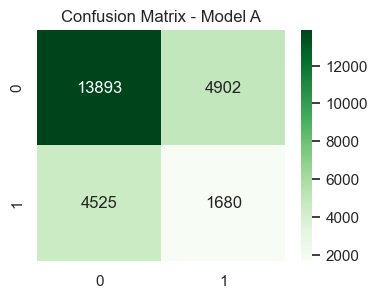

In [81]:
# 11) Model A: Decision Tree tanpa pembatas (potensi overfit)
model_a = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_a.fit(X_train, y_train)

# performance A
y_train_pred_a = model_a.predict(X_train)
y_test_pred_a = model_a.predict(X_test)
print("\n=== Model A (no max_depth) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_a))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_a))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_a))

# Confusion matrix A
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_test_pred_a), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Model A")
plt.show()


=== Model B (max_depth=6, balanced) ===
Train Accuracy: 0.60844
Test Accuracy : 0.5956
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.75      0.69      0.72     18795
           1       0.25      0.32      0.28      6205

    accuracy                           0.60     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.63      0.60      0.61     25000



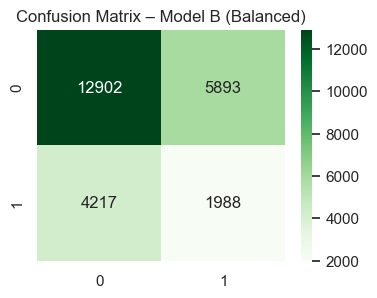

In [82]:
# Model B: Decision Tree dengan pruning & balancing data
model_b = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,             # atau None jika ingin lebih bebas
    min_samples_split=4,     # kontrol kompleksitas
    class_weight='balanced', # menyeimbangkan kelas 0 dan 1
    random_state=42
)
model_b.fit(X_train, y_train)

# Evaluasi performa
y_train_pred_b = model_b.predict(X_train)
y_test_pred_b  = model_b.predict(X_test)
print("\n=== Model B (max_depth=6, balanced) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_b))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_b))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_b))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_test_pred_b),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Model B (Balanced)")
plt.show()


In [83]:
print("Jumlah kolom fitur:", len(X.columns))
print("Nama kolom fitur:", X.columns.tolist())


Jumlah kolom fitur: 16
Nama kolom fitur: ['usia', 'jenis_kelamin_enc', 'indeks_massa_tubuh', 'langkah_harian', 'jam_tidur', 'air_minum_per_hari', 'asupan_kalori_harian', 'perokok', 'alkohol', 'denyut_jantung', 'systolic_bp', 'diastolic_bp', 'kolesterol', 'riwayat_keluarga', 'bmi_obesitas', 'tidur_singkat']


In [84]:
# === Uji coba dua contoh ekstrem: Berisiko & Tidak Berisiko ===
cols = X.columns.tolist()

contoh_berisiko = pd.DataFrame([[
    60, 1, 32.5, 3000, 5, 1.5, 3500, 1, 1, 95, 150, 95, 260, 1, 1, 1
]], columns=cols)

contoh_tidak = pd.DataFrame([[
    28, 0, 22.4, 9000, 8, 3.0, 2100, 0, 0, 70, 120, 80, 180, 0, 0, 0
]], columns=cols)

print("Prediksi contoh berisiko :", model_b.predict(contoh_berisiko)[0])
print("Prediksi contoh tidak    :", model_b.predict(contoh_tidak)[0])


Prediksi contoh berisiko : 0
Prediksi contoh tidak    : 1


In [85]:
print("Nilai unik di y (target):", y.unique())
print("Distribusi label:\n", y.value_counts())


Nilai unik di y (target): [0 1]
Distribusi label:
 risiko_penyakit
0    75179
1    24821
Name: count, dtype: int64


In [86]:
# Interpretasi hasil prediksi agar sesuai arti label
def interpret(pred):
    return "⚠️ Berisiko Tinggi" if pred == 1 else "✅ Tidak Berisiko"

print("Prediksi contoh berisiko :", interpret(model_b.predict(contoh_berisiko)[0]))
print("Prediksi contoh tidak    :", interpret(model_b.predict(contoh_tidak)[0]))


Prediksi contoh berisiko : ✅ Tidak Berisiko
Prediksi contoh tidak    : ⚠️ Berisiko Tinggi


In [87]:
# 13) Bandingkan overfitting: tampilkan selisih akurasi train-test
print("\nOverfitting check (accuracy train - test):")
print("Model A:", accuracy_score(y_train, y_train_pred_a) - accuracy_score(y_test, y_test_pred_a))
print("Model B:", accuracy_score(y_train, y_train_pred_b) - accuracy_score(y_test, y_test_pred_b))



Overfitting check (accuracy train - test):
Model A: 0.37707999999999997
Model B: 0.012839999999999963


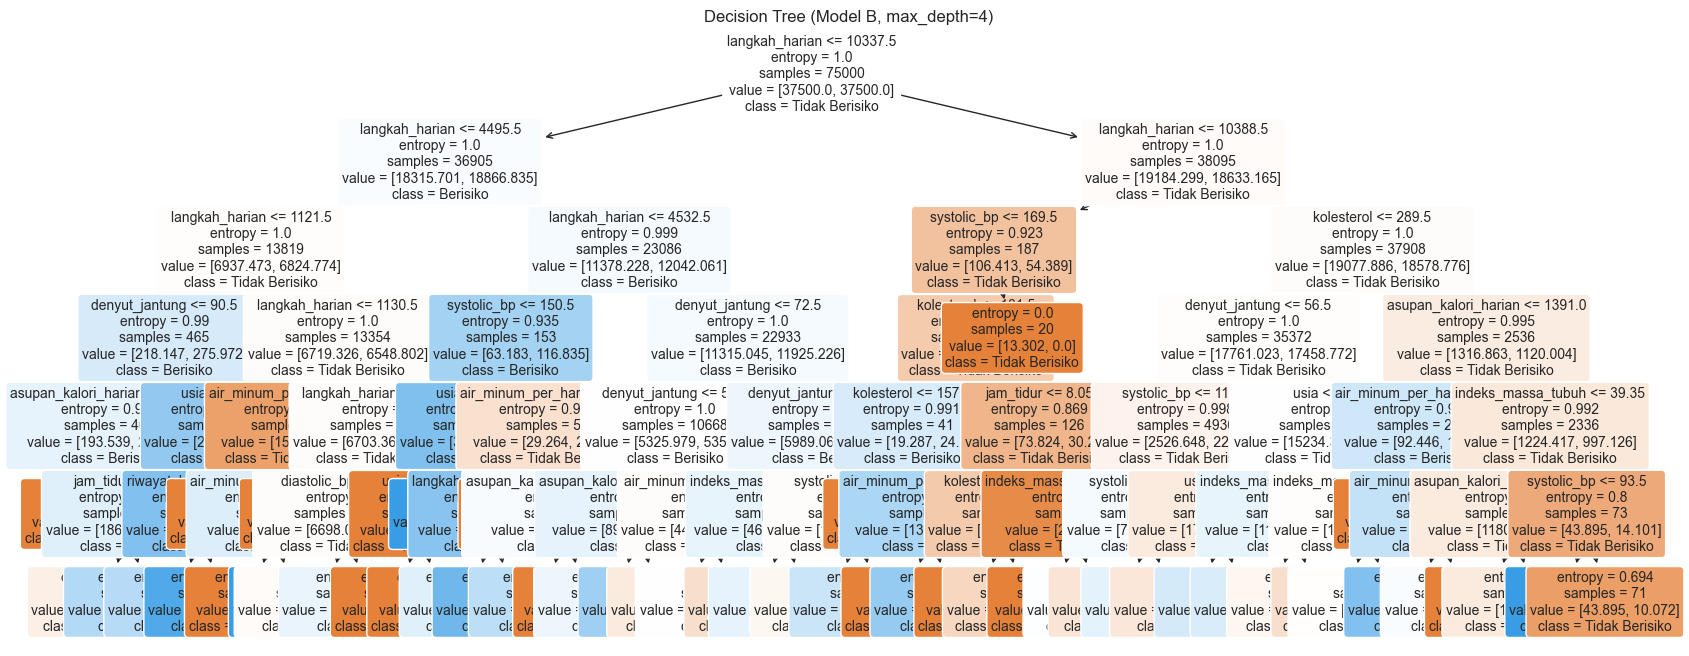

In [88]:
# 14) Visualisasi pohon Model B (interpretasi fokus)
plt.figure(figsize=(20,8))
plot_tree(model_b, feature_names=X.columns, class_names=['Tidak Berisiko','Berisiko'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (Model B, max_depth=4)")
plt.show()

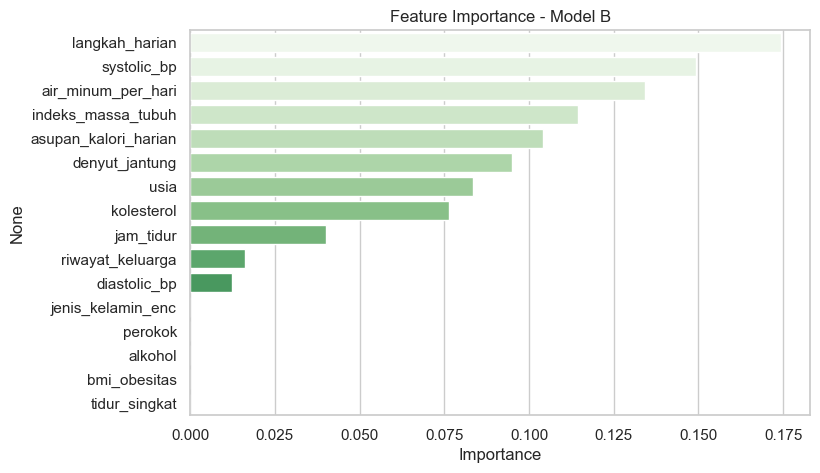


Feature importance values:
 langkah_harian          0.174232
systolic_bp             0.149351
air_minum_per_hari      0.134226
indeks_massa_tubuh      0.114468
asupan_kalori_harian    0.104123
denyut_jantung          0.095085
usia                    0.083374
kolesterol              0.076516
jam_tidur               0.040066
riwayat_keluarga        0.016285
diastolic_bp            0.012274
jenis_kelamin_enc       0.000000
perokok                 0.000000
alkohol                 0.000000
bmi_obesitas            0.000000
tidur_singkat           0.000000
dtype: float64


In [89]:
# 15) Feature importance (Model B)
importances = pd.Series(model_b.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette="Greens")
plt.title("Feature Importance - Model B")
plt.xlabel("Importance")
plt.show()
print("\nFeature importance values:\n", importances)

In [90]:
# 16) Ambil beberapa jalur dari akar ke daun (interpretasi)
from sklearn.tree import _tree
def tree_rules(clf, feature_names, class_names):
    tree = clf.tree_
    paths = []
    path = []
    def recurse(node, path):
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree.feature[node]]
            threshold = tree.threshold[node]
            # left
            recurse(tree.children_left[node], path + [f"({name} <= {threshold:.2f})"])
            # right
            recurse(tree.children_right[node], path + [f"({name} > {threshold:.2f})"])
        else:
            # leaf
            value = tree.value[node][0]
            pred = np.argmax(value)
            paths.append((path, class_names[pred], value))
    recurse(0, [])
    return paths

rules = tree_rules(model_b, X.columns.tolist(), ['Tidak Berisiko','Berisiko'])
# print top 3 rules (pendek)
for i, (path, pred, value) in enumerate(rules[:3]):
    print(f"\nJalur {i+1}:")
    print(" AND ".join(path))
    print("=> Prediksi:", pred, " (nilai leaf:", value, ")")


Jalur 1:
(langkah_harian <= 10337.50) AND (langkah_harian <= 4495.50) AND (langkah_harian <= 1121.50) AND (denyut_jantung <= 90.50) AND (asupan_kalori_harian <= 1245.00)
=> Prediksi: Tidak Berisiko  (nilai leaf: [6.65082293 0.        ] )

Jalur 2:
(langkah_harian <= 10337.50) AND (langkah_harian <= 4495.50) AND (langkah_harian <= 1121.50) AND (denyut_jantung <= 90.50) AND (asupan_kalori_harian > 1245.00) AND (jam_tidur <= 6.65)
=> Prediksi: Tidak Berisiko  (nilai leaf: [110.40366061  96.69101848] )

Jalur 3:
(langkah_harian <= 10337.50) AND (langkah_harian <= 4495.50) AND (langkah_harian <= 1121.50) AND (denyut_jantung <= 90.50) AND (asupan_kalori_harian > 1245.00) AND (jam_tidur > 6.65)
=> Prediksi: Berisiko  (nilai leaf: [ 76.48446368 124.89256554] )


In [91]:
# 17) Simpan model B sebagai final
joblib.dump(model_b, "model_risiko_penyakit.pkl")
print("\nModel B disimpan sebagai model_risiko_penyakit.pkl")


Model B disimpan sebagai model_risiko_penyakit.pkl


In [92]:
# 18) Simpan encoder mapping jenis_kelamin (agar konsisten di app)
joblib.dump({'jenis_kelamin_classes': list(le.classes_)}, "meta_encoder.json")

print("\nSelesai. Notebook siap. Lanjutkan ke pembuatan Flask app.")


Selesai. Notebook siap. Lanjutkan ke pembuatan Flask app.
